<h3>Problem Statement</h3>

we have dataset that contains transactions made by credit cards. </br>
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

<h3>Import tools</h3>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, roc_auc_score,
                             precision_recall_curve, roc_curve,average_precision_score)
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import time

<h3>Get Data</h3>

In [24]:
df = pd.read_csv('/content/creditcard.csv')

In [25]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<h3>EDA</h3>

In [26]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [27]:
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset contains only numerical input variables which are the result of a **PCA transformation**. </br>

Due to confidentiality issues, there are not provided the original features and more background information about the data.</br>

Features V1, V2, ... V28 are the principal components obtained with PCA;

<h4>Check Missing Data</h4>

In [30]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There is no null values in dataset.

<h4>Class distribution of Data</h4>

In [31]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<Axes: xlabel='Class', ylabel='count'>

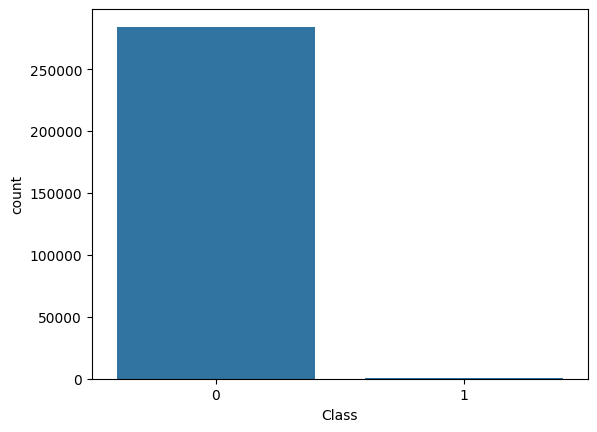

In [32]:
sns.countplot(x='Class', data=df)

<h5>Data is highly imbalanced</h5>

In [33]:
print(f'Fraud percentage in Data: {(492/(492+284315))*100} %')

Fraud percentage in Data: 0.1727485630620034 %


<h4>Feature Correlation</h4>

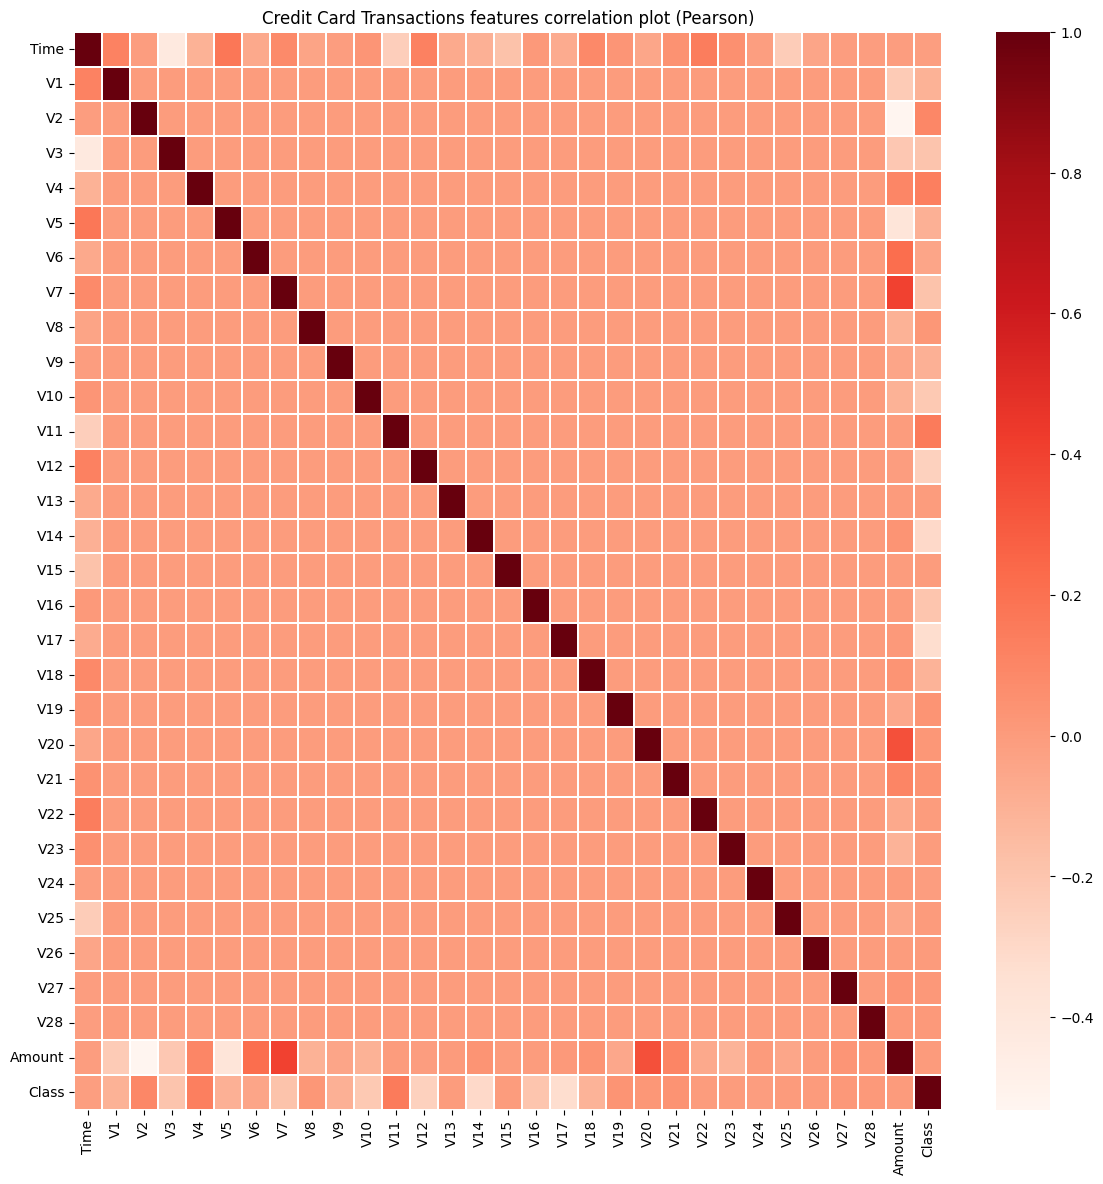

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,linewidths=.1,cmap="Reds")
plt.show()

 there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

## Models

In [ ]:
X = df.drop(['Time','Class'], axis = 1) #time will not help in the predition
y = df['Class']

**Scalling the data before Splitting the data in *train*, *test set***

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

amount is not scalled here. that's why we are **Standardize** it(Even if v1 to v28 were **PCA** components). which can be helpful for models like *Logistic regression* and *SVM*.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

Becuase data is too imbalanced we will use **SMOTE** (only in training set)

In [38]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<h5>Defining Models</h5>

In [39]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}


In [40]:
# Store curve data for plotting
roc_data = {}
pr_data = {}
results = []

In [41]:
for name, model in models.items():
    print(f'Running the {model} model.....')
    start_time = time.time()
    model.fit(X_train_smote, y_train_smote)
    end_time = time.time()
    elapsed = end_time - start_time

    print(f'Training time for {name}: {elapsed:.2f} seconds')

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[: ,1]

    # Metrics
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    results.append({
        "Model": name,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Time (s)": round(elapsed, 2)
    })

    # Store data for later plotting
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)

    roc_data[name] = (fpr, tpr, roc_auc)
    pr_data[name] = (rec, prec, pr_auc)

Running the LogisticRegression() model.....
Training time for Logistic Regression: 4.17 seconds
Running the RandomForestClassifier(n_jobs=-1) model.....
Training time for Random Forest: 259.39 seconds
Running the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) model.....
Training time

In [42]:
results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print(results_df)

                 Model   ROC-AUC    PR-AUC  Precision    Recall  F1-score  \
2              XGBoost  0.969323  0.825490   0.754717  0.810811  0.781759   
0  Logistic Regression  0.968054  0.706542   0.061676  0.885135  0.115317   
1        Random Forest  0.961889  0.830132   0.875000  0.756757  0.811594   

   Time (s)  
2      7.64  
0      4.17  
1    259.39  


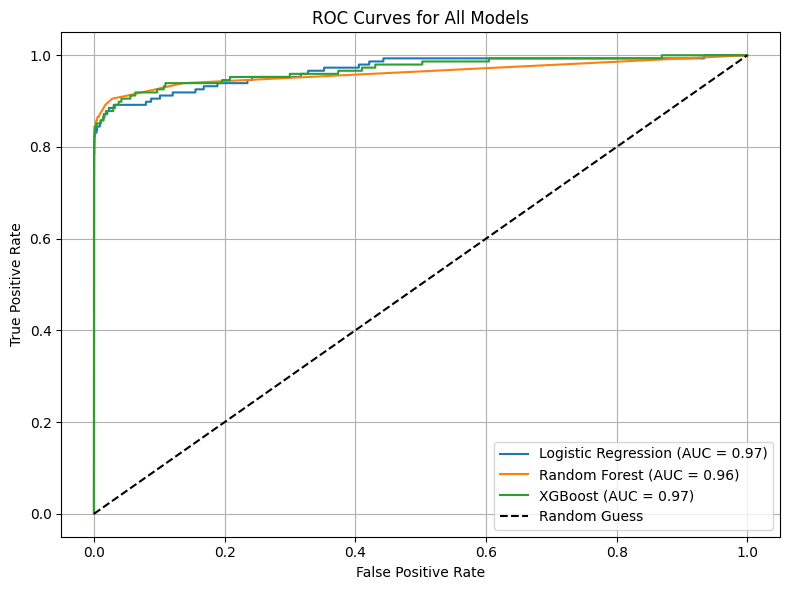

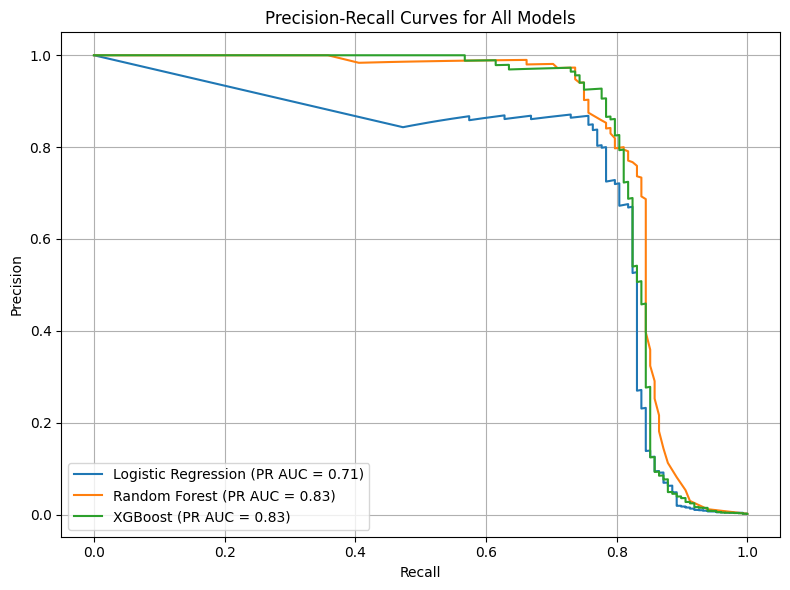

In [43]:
# ---- Plot All ROC Curves Together ----
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- Plot All Precision-Recall Curves Together ----
plt.figure(figsize=(8, 6))
for name, (rec, prec, pr_auc) in pr_data.items():
    plt.plot(rec, prec, label=f'{name} (PR AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h4>Interpretation </h4>

 -- **Best Overall: Random Forest**

Highest F1-score (0.811) -> Best balance of precision and recall.

Highest precision (0.857) -> Most fraud predictions are correct.

Strong recall (0.770) -> Catches a good amount of fraud.

PR-AUC is best (0.826) -> Indicates good performance on positive (fraud) class.

-- **Strong Contender: XGBoost**

Very high ROC-AUC (0.969) -> Excellent general classification ability.

Best recall (0.811) -> Catches the most fraud.

Lower precision (0.755) -> More false positives than Random Forest.

F1-score slightly lower than RF -> Slightly less balanced.

-- **Poor in Practice: Logistic Regression**

High recall (0.885) but extremely low precision (0.062) → Predicts almost everything as fraud.

F1-score is very low (0.115) → Not usable in real-world scenario without threshold tuning.

Might serve as a baseline but not production-ready without improvements.

- If false positives are more costly, Random Forest is better(better precision).

- If catching all fraud is more important, XGBoost is better(better recall).

<h4>Saving the Models</h4>

In [62]:
rf_model = models['Random Forest']
xgboost_model_ = models['XGBoost']

In [63]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgboost_model_, file)